In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
inputs = tf.placeholder(tf.float32, [None, 3000], 'inputs')
targets = tf.placeholder(tf.float32, [None, 10], 'targets')

In [56]:
def get_error_and_accuracy(data):
    """Calculate average error and classification accuracy across a dataset.
    
    Args:
        data: Data provider which iterates over input-target batches in dataset.
        
    Returns:
        Tuple with first element scalar value corresponding to average error
        across all batches in dataset and second value corresponding to
        average classification accuracy across all batches in dataset.
    """
    err = 0
    acc = 0
    for input_batch, target_batch in data:
        err += sess.run(error, feed_dict={inputs: input_batch, targets: target_batch})
        acc += sess.run(accuracy, feed_dict={inputs: input_batch, targets: target_batch})
    err /= data.num_batches
    acc /= data.num_batches
    return err, acc

In [57]:
n_hidden_1 = 100
beta = 0.01 #0.009

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_2hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    out_layer = tf.nn.softmax(tf.matmul(layer_1, weights['out']) + biases['out'])
    return out_layer
out_layer = multilayer_2hidden100(inputs)

per_datapoint_errors = (out_layer - targets) * (out_layer - targets)
error = tf.reduce_sum(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)

import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 100
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc, lr = sess.run(
            [train_step, error, accuracy, learning_rate], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc), 'learning rate = {1:.3f}'.format(e + 1, lr))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
LS_2layers_100_t = [error_train, acc_train, error_valid, acc_valid]
np.save('LS_2layers_100_t', LS_2layers_100_t)

End of epoch 1: running error average = 1487.12 running acc average = 0.13 learning rate = 0.001
End of epoch 2: running error average = 1324.35 running acc average = 0.18 learning rate = 0.001
End of epoch 3: running error average = 1185.38 running acc average = 0.25 learning rate = 0.001
End of epoch 4: running error average = 1065.36 running acc average = 0.29 learning rate = 0.001
End of epoch 5: running error average = 958.99 running acc average = 0.31 learning rate = 0.001
End of epoch 6: running error average = 863.77 running acc average = 0.34 learning rate = 0.001
End of epoch 7: running error average = 778.32 running acc average = 0.36 learning rate = 0.001
End of epoch 8: running error average = 702.57 running acc average = 0.38 learning rate = 0.001
End of epoch 9: running error average = 634.31 running acc average = 0.40 learning rate = 0.001
End of epoch 10: running error average = 572.22 running acc average = 0.42 learning rate = 0.001
End of epoch 11: running error aver

End of epoch 87: running error average = 18.17 running acc average = 0.90 learning rate = 0.001
End of epoch 88: running error average = 18.07 running acc average = 0.90 learning rate = 0.001
End of epoch 89: running error average = 18.09 running acc average = 0.90 learning rate = 0.001
End of epoch 90: running error average = 18.58 running acc average = 0.90 learning rate = 0.001
End of epoch 91: running error average = 18.24 running acc average = 0.90 learning rate = 0.001
End of epoch 92: running error average = 18.33 running acc average = 0.90 learning rate = 0.001
End of epoch 93: running error average = 18.25 running acc average = 0.90 learning rate = 0.001
End of epoch 94: running error average = 18.02 running acc average = 0.90 learning rate = 0.001
End of epoch 95: running error average = 17.93 running acc average = 0.90 learning rate = 0.001
End of epoch 96: running error average = 18.05 running acc average = 0.90 learning rate = 0.001
End of epoch 97: running error average =

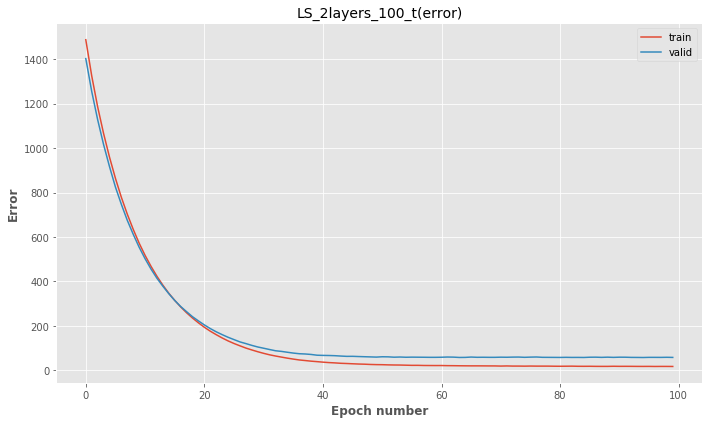

In [58]:
data = LS_2layers_100_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('LS_2layers_100_t(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('LS_2layers_100_t(error).pdf')

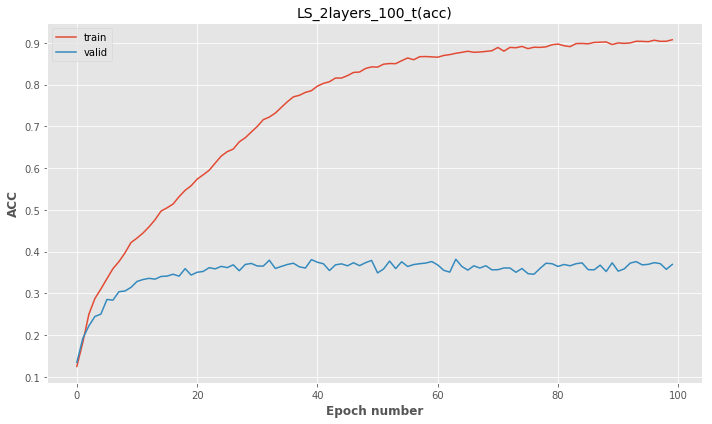

In [59]:
data = LS_2layers_100_t

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('LS_2layers_100_t(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('LS_2layers_100_t(acc).pdf')

In [53]:
inputs = tf.placeholder(tf.float32, [None, 3000], 'inputs')
targets = tf.placeholder(tf.float32, [None, 25], 'targets')

In [54]:
n_hidden_1 = 100
beta = 0.01 #0.009

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, 25]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([25]))
}
def multilayer_2hidden100(data):
    layer_1 = tf.nn.tanh(tf.matmul(data, weights['h1']) + biases['b1'])
    out_layer = tf.nn.softmax(tf.matmul(layer_1, weights['out']) + biases['out'])
    return out_layer
out_layer = multilayer_2hidden100(inputs)

per_datapoint_errors = (out_layer - targets) * (out_layer - targets)
error = tf.reduce_sum(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)

import data_providers as data_providers
train_data = data_providers.MSD25GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD25GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 100
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc, lr = sess.run(
            [train_step, error, accuracy, learning_rate], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
LS_2layers_100_t_25 = [error_train, acc_train, error_valid, acc_valid]
np.save('LS_2layers_100_t_25', LS_2layers_100_t_25)

End of epoch 1: running error average = 1495.52 running acc average = 0.08
End of epoch 2: running error average = 1329.57 running acc average = 0.14
End of epoch 3: running error average = 1186.02 running acc average = 0.18
End of epoch 4: running error average = 1058.81 running acc average = 0.21
End of epoch 5: running error average = 944.55 running acc average = 0.23
End of epoch 6: running error average = 841.83 running acc average = 0.26


KeyboardInterrupt: 

In [ ]:
data = LS_2layers_100_t_25

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('LS_2layers_100_t_25(error)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('LS_2layers_100_t_25(error).pdf')

In [ ]:
data = LS_2layers_100_t_25

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('LS_2layers_100_t_25(acc)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('LS_2layers_100_t_25(acc).pdf')